In [11]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_base = pl.read_csv("/home/tat/Research/app/ee_T/exp_hase1/wandb_export_2024-10-31T12_42_21.564+09_00.csv", infer_schema_length=1000)


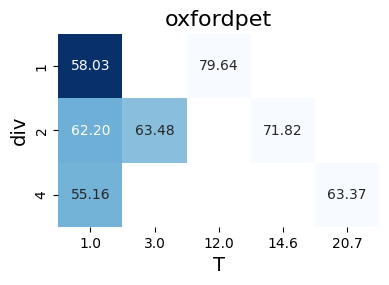

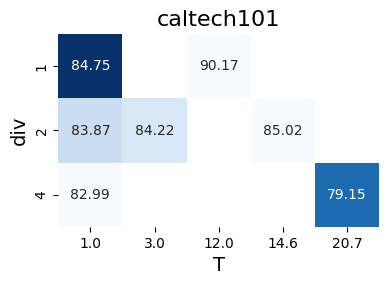

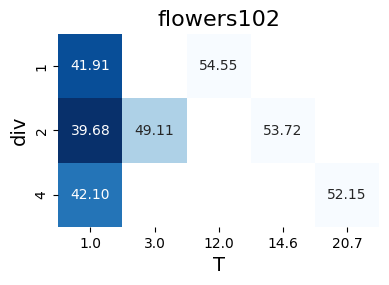

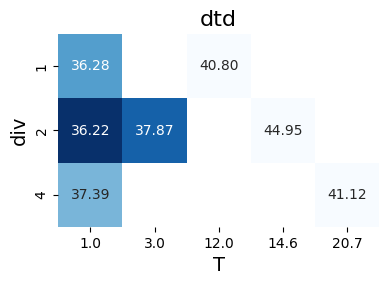

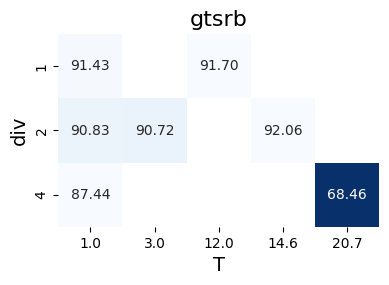

In [13]:
df = df_base
df = df.filter(pl.col("Name") != "resnet50_12.0_4_12")

datasets = df["dataname"].unique()



for dataset in datasets:
    df_ds = df.filter(pl.col("dataname") == dataset)

    piv_index = "T"
    piv_columns = "div"
    
    df_piv = df_ds.pivot(values="test_acc", index=piv_index, on=piv_columns, sort_columns=True)
    df_piv_diff = df_piv.with_columns((pl.all().exclude(piv_index) - pl.all().exclude(piv_index).min()).name.keep())
    df_piv_diff = df_piv.with_columns((pl.all().exclude(piv_index) / pl.all().exclude(piv_index).max()).name.keep())

    df_piv_ind = pl.Series(df_piv.columns[1:]).cast(pl.Int32)
    df_piv = df_piv.transpose(include_header=False, column_names=df_piv[piv_index].cast(pl.String))[1:]
    df_piv = pl.concat([pl.DataFrame({piv_columns: df_piv_ind}), df_piv], how="horizontal")
    df_piv = df_piv.sort(by=piv_columns, descending=False)
    # df_piv = df_piv.sort(by=piv_columns, descending=True)
    
    df_piv_diff_ind = pl.Series(df_piv_diff.columns[1:]).cast(pl.Int32)
    df_piv_diff = df_piv_diff.transpose(include_header=False, column_names=df_piv_diff[piv_index].cast(pl.String))[1:]
    df_piv_diff = pl.concat([pl.DataFrame({piv_columns: df_piv_diff_ind}), df_piv_diff], how="horizontal")
    df_piv_diff = df_piv_diff.sort(by=piv_columns, descending=False)
    # df_piv_diff = df_piv_diff.sort(by=piv_columns, descending=True)

    df_piv_val = df_piv.select([str(num) for num in sorted(df_piv.columns[1:], key=float)])
    df_piv_diff_val = df_piv_diff.select([str(num) for num in sorted(df_piv_diff.columns[1:], key=float)])
    
    fig, ax = plt.subplots(figsize=(len(df_piv.columns)/1.2, len(df_piv)/1.2))
    ax = sns.heatmap(df_piv_diff_val, annot=df_piv_val*100, cbar=False, square=True, cmap="Blues_r", xticklabels=pl.Series(df_piv_val.columns).str.head(4), yticklabels=df_piv[piv_columns], fmt=".2f")
    # ax = sns.heatmap(df_piv_val, annot=df_piv_val*100, cbar=True, square=True, cmap="Blues_r", xticklabels=pl.Series(df_piv_val.columns).str.head(4), yticklabels=df_piv_ind, fmt=".2f")
    ax.set_title(f"{dataset}", fontsize=16)
    # ax.set_title(f"{dataset[:-6]}", fontsize=16)
    ax.set_xlabel(piv_index, fontsize=14)
    ax.set_ylabel(piv_columns, fontsize=14, rotation=90)
    plt.show()
